# Import Data

Data cleaning incorporated some of the following techniques: 

https://www.kaggle.com/jagdmir/house-price-predictions-data-cleaning-eda

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Used for auto-formatting code
# terminal - pip install nb_black
%load_ext nb_black

# Display all columns
pd.set_option("display.max_columns", None)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [7]:
# Import entire dataset
house_data = pd.read_csv("data/train.csv")
house_data.drop("Id", 1, inplace=True)  # remove ID column because useless
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<IPython.core.display.Javascript object>

In [8]:
# Determine size of dataset
house_data.shape  # 1460 rows x 80 columns

# Isolate 1st 30 columns for Jon
jon_data = house_data.iloc[:, :30]
jon_data.shape  # 1460 rows x 30 columns
jon_data.sample(20)  # view sample of data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual
158,60,FV,100.0,12552,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd
832,60,RL,44.0,9548,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,6,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,223.0,Gd,TA,PConc,Gd
864,20,FV,72.0,8640,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Ex
102,90,RL,64.0,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN
1176,20,RL,37.0,6951,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,1984,1985,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA
1414,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1.5Fin,6,7,1923,2000,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA
1205,20,RL,90.0,14684,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,7,1990,1991,Hip,CompShg,HdBoard,HdBoard,BrkFace,234.0,Gd,TA,CBlock,Gd
227,160,RM,21.0,1869,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,6,1970,1970,Gable,CompShg,HdBoard,HdBoard,BrkFace,127.0,TA,TA,CBlock,TA
1232,90,RL,70.0,9842,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,NAmes,Norm,Norm,Duplex,1Story,4,5,1962,1962,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,Slab,NaN
701,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,7,5,1969,1969,Hip,CompShg,HdBoard,HdBoard,BrkFace,168.0,TA,TA,CBlock,TA


<IPython.core.display.Javascript object>

# Data Exploration

Variable Notes: 
1. MSSubClass = type of swelling 
2. MSZoning = general zoning  
3. LotFrontage = linear feet of street connected ot property (ft)
4. LotArea = size (ft^2) 
5. Street = type of road (gravel, paved) 
6. Alley = type of access (gravel, paved, no alley)
7. LotShape = shape of property 
8. LandContour = flatness of property 
9. Utilities = type of utilities available 
10. LotConfig = configuration of lot (corner, culdesac) 
11. LandSlope = slope of property 
12. Neighborhood = physicial town within Ames 
13. Condition 1 = proximity to railroads, etc 
14. Condition 2 = if 1+ condition is present 
15. BldgType = type of dwelling (duplex, townhouse, etc) 
16. HomeStyle = style of dwelling (1story, split level, etc) 
17. Overall Quality = rating material/finish of house 
18. OverallCond = rate overall condition 
19. YearBuilt = original construction date
20. YearREmodAdd = remodeled date (same as yearbuilt if no remodeling)
21. RoofStyle = type of roof 
22. RoofMatl = type of roof material 
23. Exterior1st = exterior covering on house 
24. Exterior2nd = exterior covering on house 
25. MasVnrType = Masonry veneer type 
26. MasVnrArea = masonry veneer area (ft^2)
27. ExterQual = quality of material on exterior 
28. ExterCond = condition of material
29. Foundation = type of foundation
30. BsmtQual = range of basement heights

In [9]:
# Checkout dataset
jon_data.info()  # outputs data type and number of non-null values

# Results: Values missing for some variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 30 columns):
MSSubClass      1460 non-null int64
MSZoning        1460 non-null object
LotFrontage     1201 non-null float64
LotArea         1460 non-null int64
Street          1460 non-null object
Alley           91 non-null object
LotShape        1460 non-null object
LandContour     1460 non-null object
Utilities       1460 non-null object
LotConfig       1460 non-null object
LandSlope       1460 non-null object
Neighborhood    1460 non-null object
Condition1      1460 non-null object
Condition2      1460 non-null object
BldgType        1460 non-null object
HouseStyle      1460 non-null object
OverallQual     1460 non-null int64
OverallCond     1460 non-null int64
YearBuilt       1460 non-null int64
YearRemodAdd    1460 non-null int64
RoofStyle       1460 non-null object
RoofMatl        1460 non-null object
Exterior1st     1460 non-null object
Exterior2nd     1460 non-null object
MasVnrType  

<IPython.core.display.Javascript object>

### Univariate Exploratory Data Analysis

In [10]:
# Sort variables by categorical, ordinal, and continuous data types
category_vars = []
num_continuous_vars = []
num_discreet_vars = []

for colm in jon_data.columns:
    if jon_data[colm].dtypes == "O":
        category_vars.append(colm)
    else:
        if jon_data[colm].nunique() > 25:
            num_continuous_vars.append(
                colm
            )  # assume >25 unique values is continuous variable
        else:
            num_discreet_vars.append(colm)


# Print out sorted variables
print("Categorical Variables:", category_vars)
print("=" * 50)
print("Continuous Variables:", num_continuous_vars)
print("=" * 50)
print("Discreet Varaible:", num_discreet_vars)

Categorical Variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual']
Continuous Variables: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea']
Discreet Varaible: ['MSSubClass', 'OverallQual', 'OverallCond']


<IPython.core.display.Javascript object>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2808f3d0>,
      dtype=object)

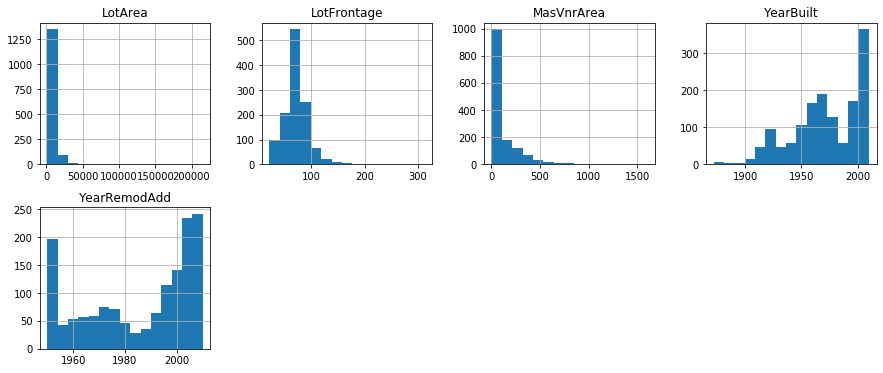

<IPython.core.display.Javascript object>

In [21]:
# Look at variance within CONTINUOUS dataset
jon_data[num_continuous_vars].hist(
    bins=15, figsize=(15, 6), layout=(math.ceil(len(num_continuous_vars) / 4), 4)
)

# Results: 
    # LotArea, LotFrontage, and MasVnrArea = skewed right
    # YearBuilt = skewed left, but not too bad
    # YearRemodAdd = Bimodal

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a28d31450>,
      dtype=object)

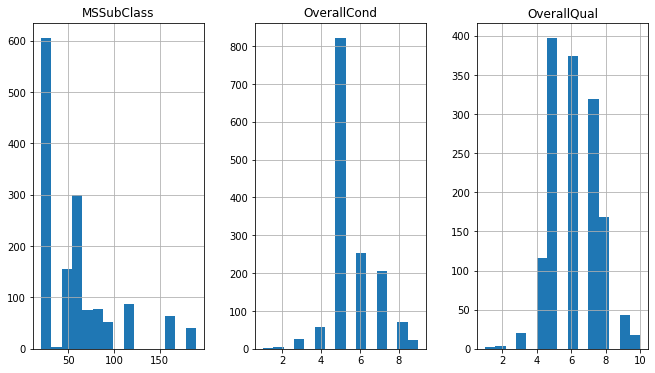

<IPython.core.display.Javascript object>

In [22]:
# Look at variance within DISCREET dataset
jon_data[num_discreet_vars].hist(
    bins=15, figsize=(15, 6), layout=(math.ceil(len(num_discreet_vars) / 4), 4)
)

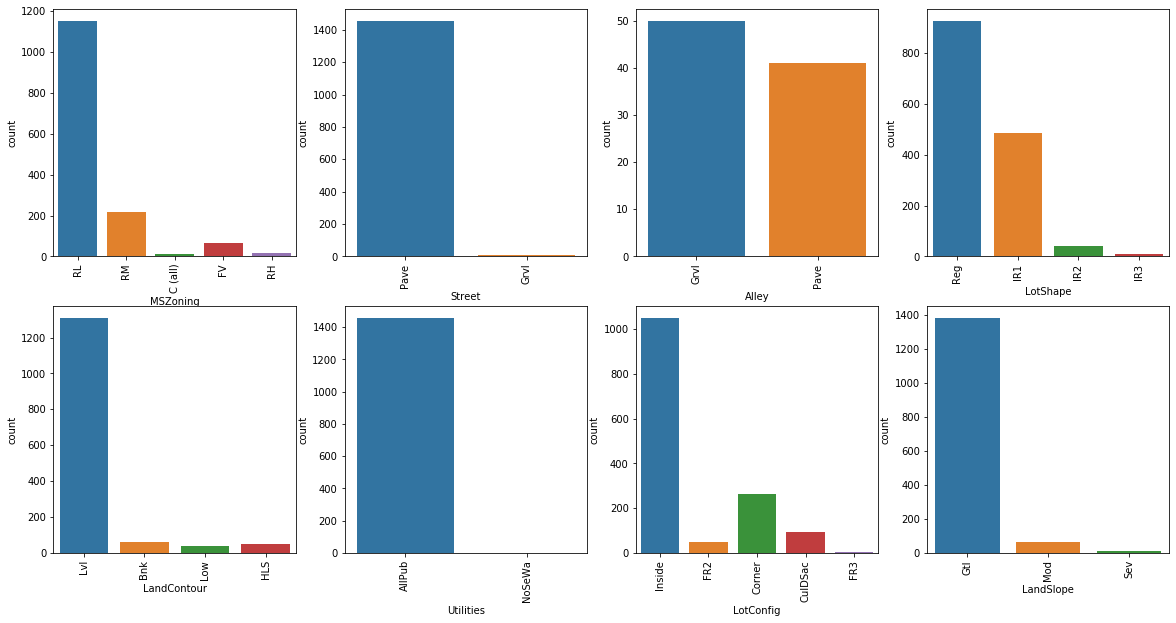

<IPython.core.display.Javascript object>

In [24]:
# Look at variance within CATEGORICAL dataset
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
for variable, subplot in zip(category_vars, ax.flatten()):
    sns.countplot(jon_data[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

### Bivariate Exploratory Data Analysis

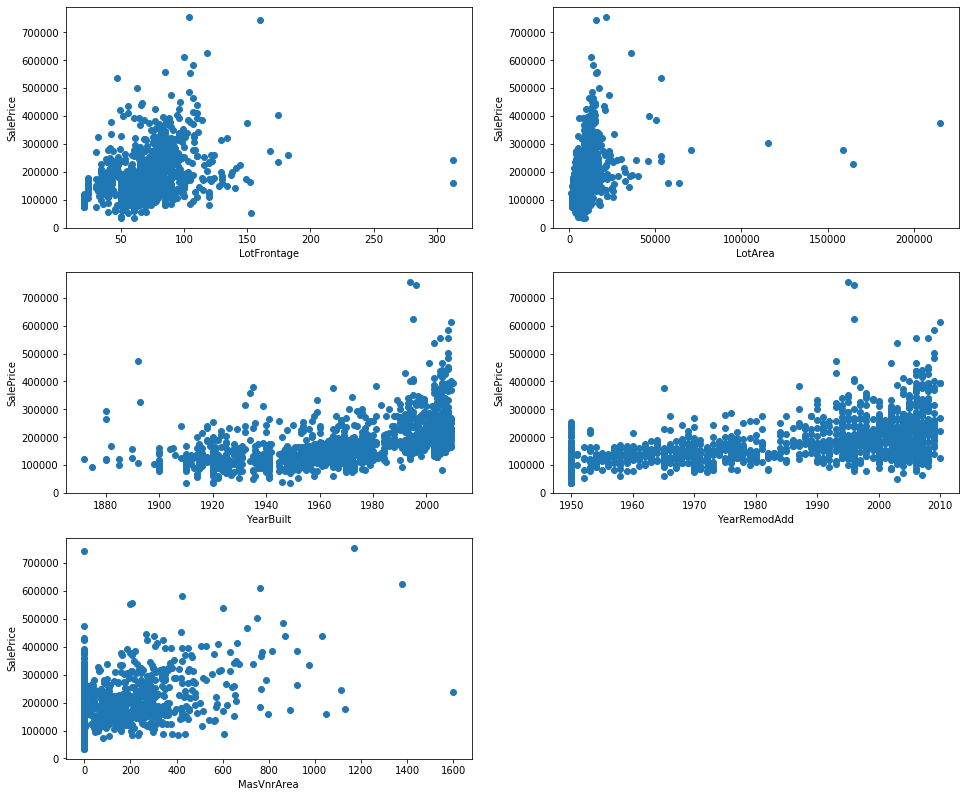

<IPython.core.display.Javascript object>

In [29]:
# Plot sales price as a function of CONTINUOUS numerical variable data
plt.figure(figsize=(16, 48))
for idx, col in enumerate(num_continuous_vars):
    plt.subplot(10, 2, idx + 1)
    plt.scatter(x=jon_data[col], y=house_data["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)

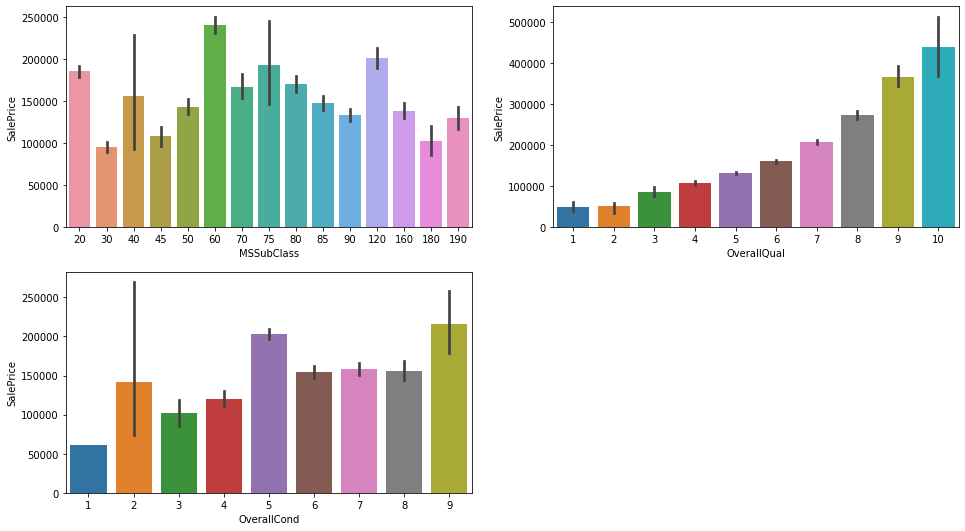

<IPython.core.display.Javascript object>

In [69]:
# Plot sales price as a function of DISCREET numeric variable data
plt.figure(figsize=(16, 48))
for idx, col in enumerate(num_discreet_vars):
    plt.subplot(10, 2, idx + 1)
    sns.barplot(x=jon_data[col], y=house_data["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)

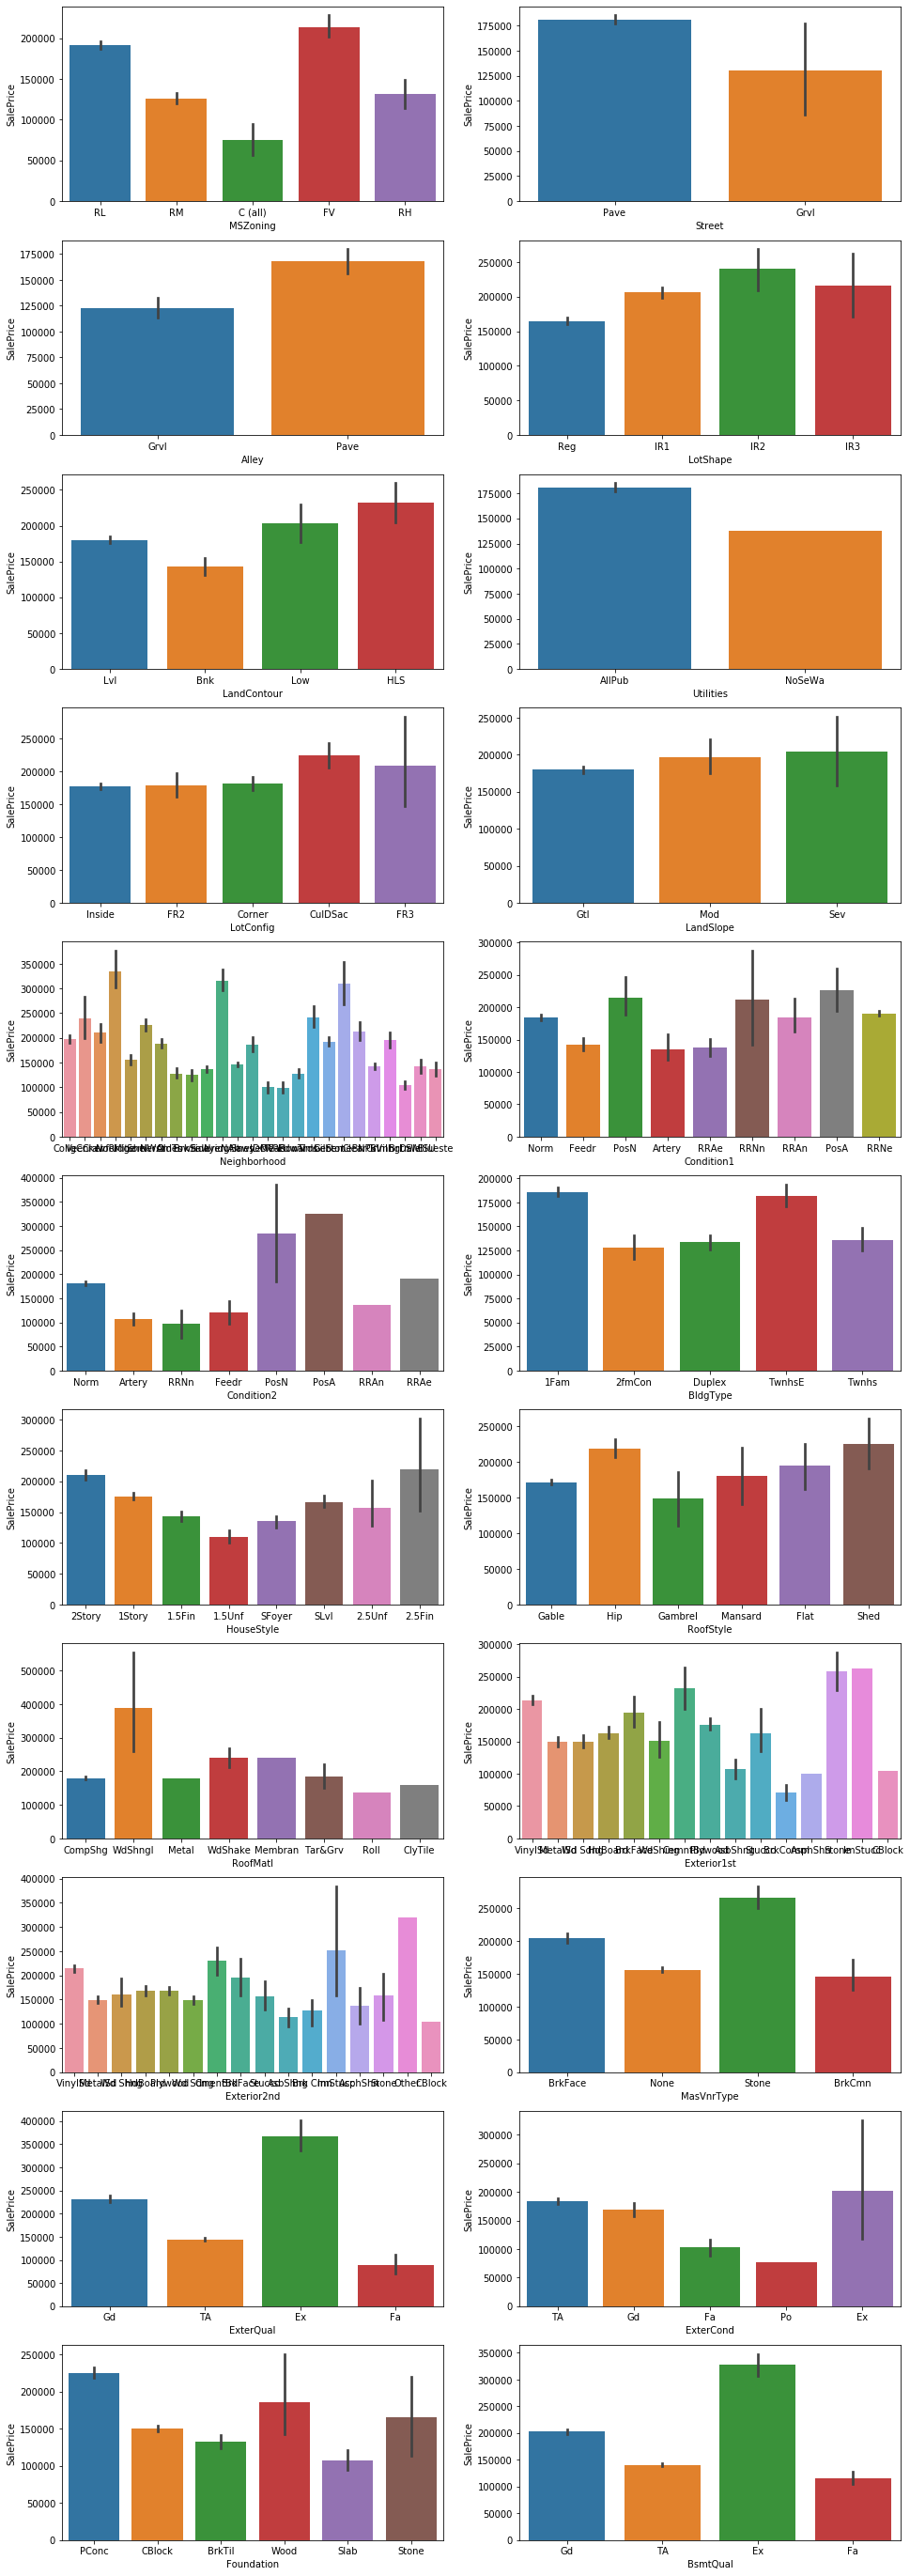

<IPython.core.display.Javascript object>

In [71]:
# Plot sales price as a function of CATEGORICAL variable data
plt.figure(figsize=(16, 100))
for idx, col in enumerate(category_vars):
    plt.subplot(22, 2, idx + 1)
    sns.barplot(x=jon_data[col], y=house_data["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)

### Visualize Missing Data

In [39]:
# terminal - pip install missingno
import missingno as msno

<IPython.core.display.Javascript object>

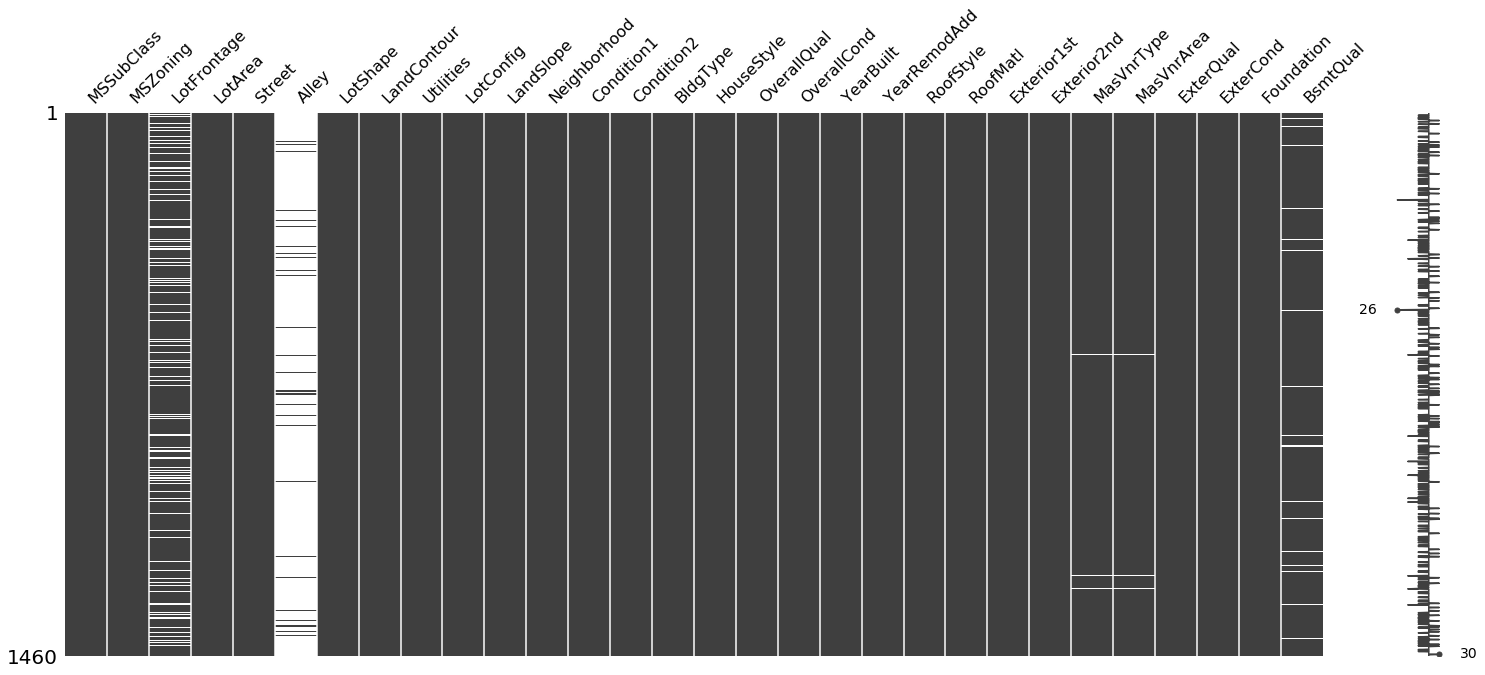

<IPython.core.display.Javascript object>

In [40]:
# Plot missing values as a matrix
msno.matrix(jon_data)

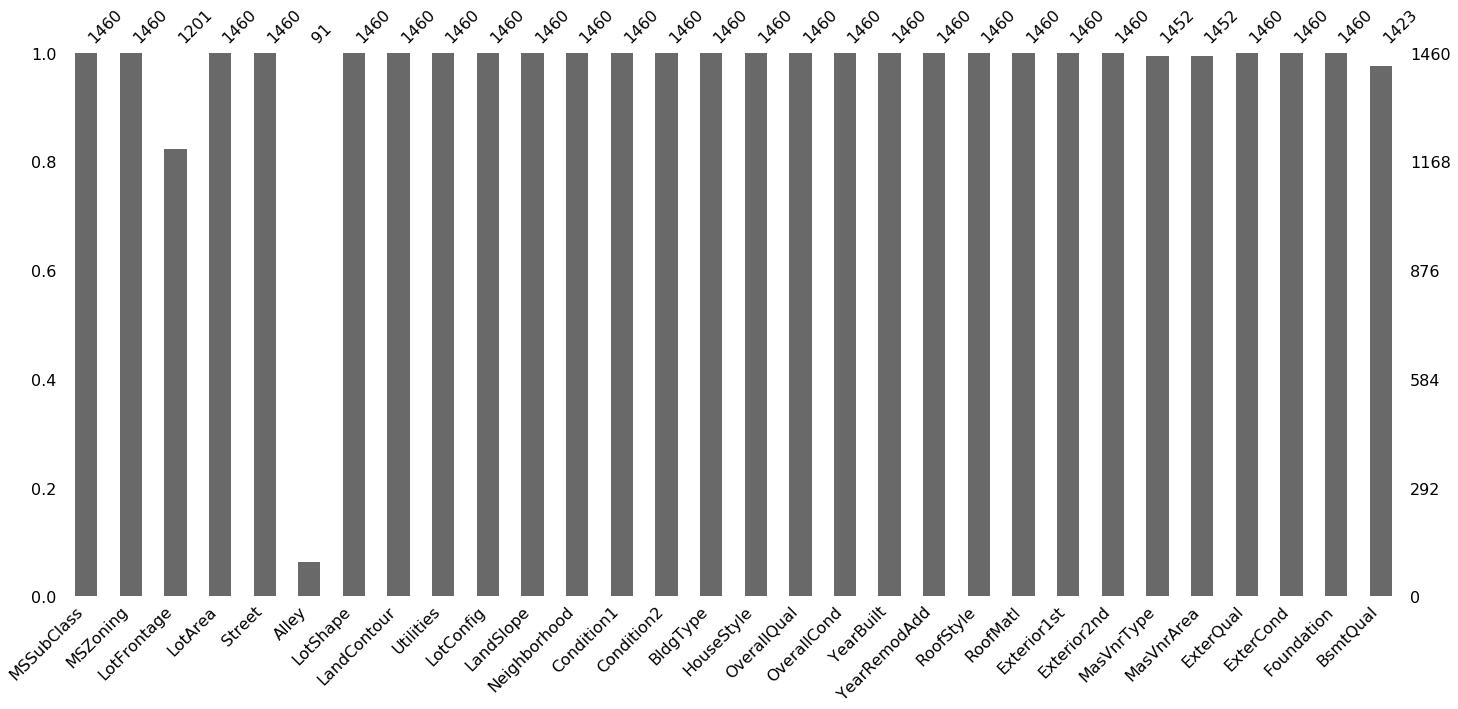

<IPython.core.display.Javascript object>

In [41]:
# Plot percentage of variables with missing data
msno.bar(jon_data)

# Results: Values at top indicate total number of values (<1460 = missing value)
    # MasvnrType & MasVnrArea missing ~0.5%
    # LotFrontage: ~18% is missing
    # Alley: ~95% is missing
    # BsmtQual: ~3% is missing

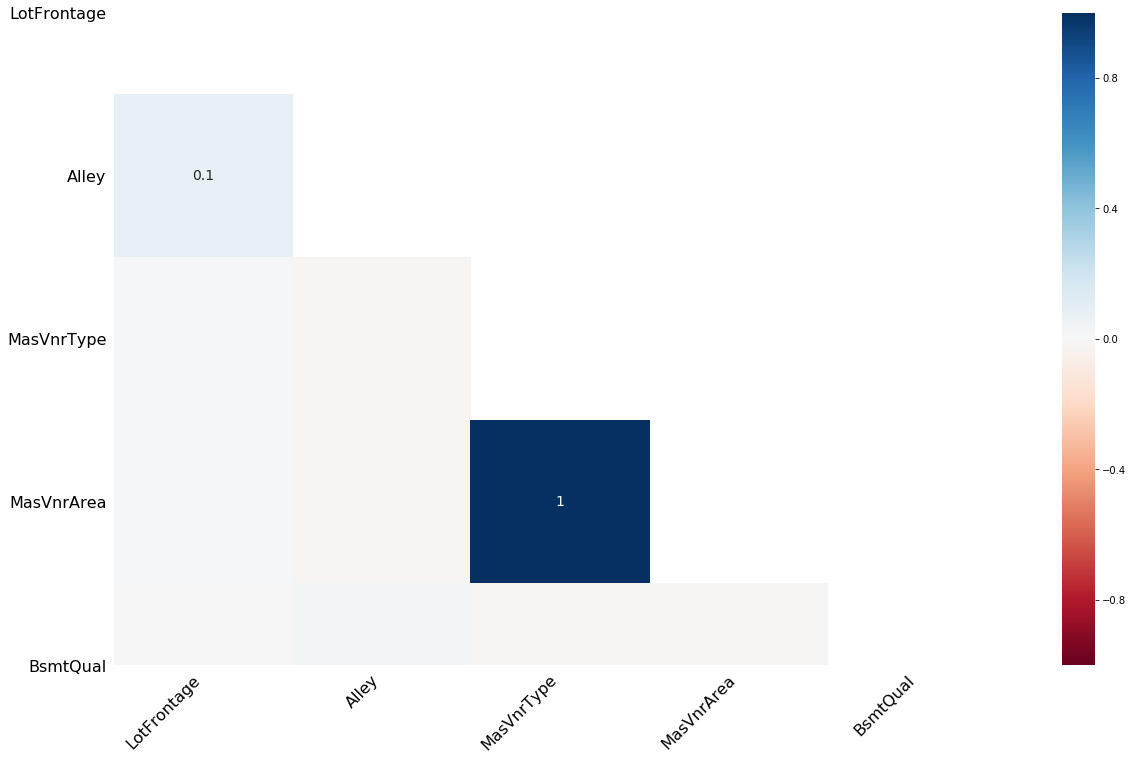

<IPython.core.display.Javascript object>

In [42]:
# Plot heatmap of missing values
# Correlation between the missing values in different columns?

msno.heatmap(jon_data)

# Results: Observations missing MasVnrType also did not include MasVnrArea (only ~0.5% of data)